**Recognizing handwritten digits**

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

11493376/11490434 [==============================] - 0s 0us/step


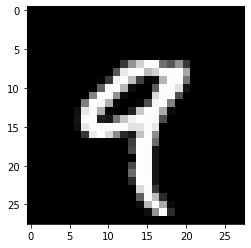

9
Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[4], cmap="gray")
plt.show()
print (y_train[4])
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9997 - val_loss: 5.9400 - val_accuracy: 0.9792
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9995 - val_loss: 5.6977 - val_accuracy: 0.9809
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0152 - accuracy: 0.9998 - val_loss: 4.8379 - val_accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9997 - val_loss: 5.2977 - val_accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0305 - accuracy: 0.9996 - val_loss: 5.4961 - val_accuracy: 0.9810




--------- Prediction --------- 




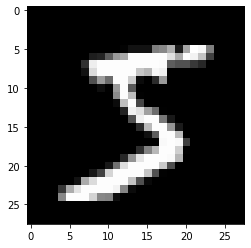



 Output: 5


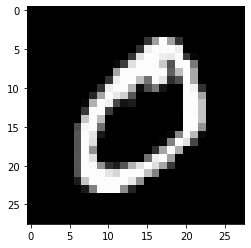



 Output: 0


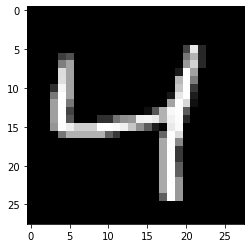



 Output: 4


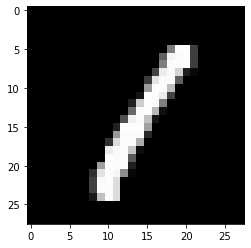



 Output: 1


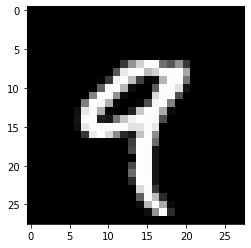



 Output: 9


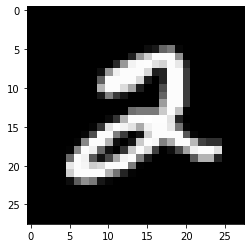



 Output: 2


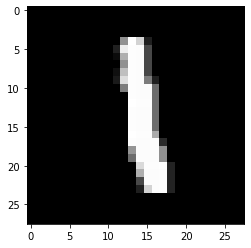



 Output: 1


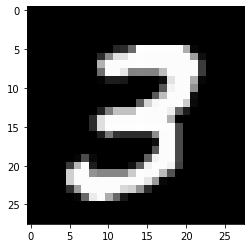



 Output: 3


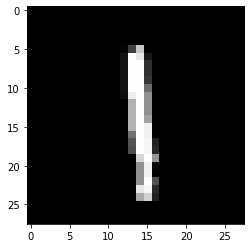



 Output: 1


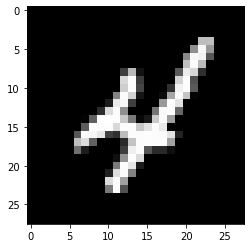



 Output: 4


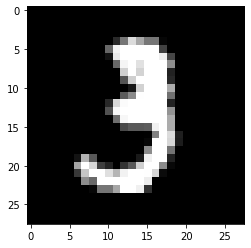



 Output: 3


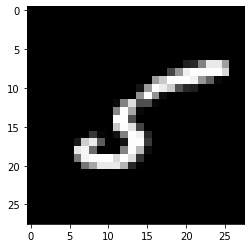



 Output: 5


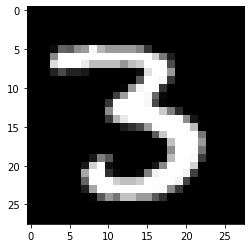



 Output: 3


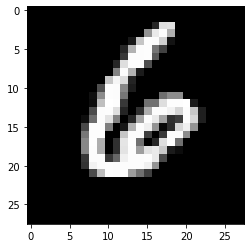



 Output: 6


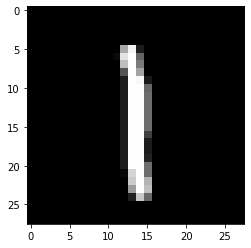



 Output: 1


In [ ]:
print ("\n\n--------- Prediction --------- \n\n")
for i in range (15):
  example = X_train[i]
  prediction = model.predict(example.reshape(1, 28, 28, 1))
  plt.imshow(example.reshape(28, 28), cmap="gray")
  plt.show()
  print("\n\n Output: {}".format(np.argmax(prediction)))






----------------Contoured Image--------------------


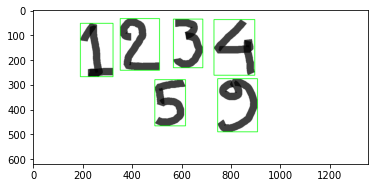

In [ ]:
image = cv2.imread('/content/Untitled.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c) 
    
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values = 0)
    
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




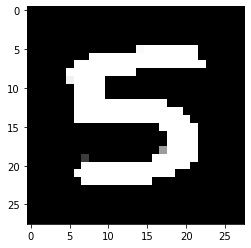



Final Output: 5


---------------------------------------


=========PREDICTION============ 




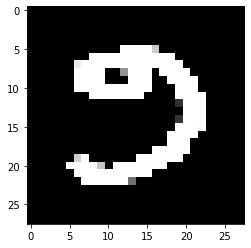



Final Output: 2


---------------------------------------


=========PREDICTION============ 




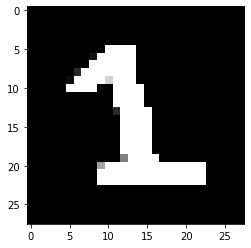



Final Output: 2


---------------------------------------


=========PREDICTION============ 




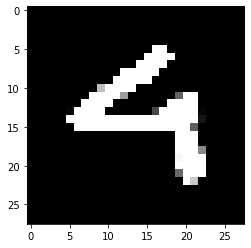



Final Output: 4


---------------------------------------


=========PREDICTION============ 




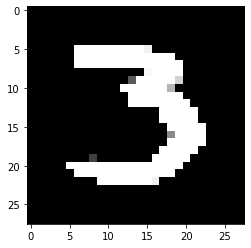



Final Output: 3


---------------------------------------


=========PREDICTION============ 




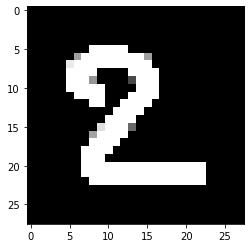



Final Output: 2


In [ ]:
for digit in inp:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    